In [116]:
import sys
!{sys.executable} -m pip install httpx attrs python-dateutil pyarrow pandas tqdm plotnine
!{sys.executable} -m pip install pydelfini


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [117]:
from pydelfini import login
client = login('delfini.bioteam.net')

To activate your session, visit the URL below:
   https://delfini.bioteam.net/login/activate/rUGdjHC6pws1cZWtiao95A.vwdqiVNcaulupZcC_seJEENXsI0

Waiting for session activation...


In [118]:
mhsvi = client.get_collection_by_name('MHSVI')

In [119]:
svi_df = mhsvi['mh_svi_county_2018.csv'].table()

Loading mh_svi_county_2018.csv: 100%|██████████| 3142/3142 [00:05<00:00, 532.07it/s]


In [120]:
svi_df

OID_  ST    STATE ST_ABBR      COUNTY   FIPS  \
0        1  01  ALABAMA      AL     Autauga  01001   
1        2  01  ALABAMA      AL     Baldwin  01003   
2        3  01  ALABAMA      AL     Barbour  01005   
3        4  01  ALABAMA      AL        Bibb  01007   
4        5  01  ALABAMA      AL      Blount  01009   
...    ...  ..      ...     ...         ...    ...   
3137  3138  56  WYOMING      WY  Sweetwater  56037   
3138  3139  56  WYOMING      WY       Teton  56039   
3139  3140  56  WYOMING      WY       Uinta  56041   
3140  3141  56  WYOMING      WY    Washakie  56043   
3141  3142  56  WYOMING      WY      Weston  56045   

                        LOCATION  E_TOTPOP  M_TOTPOP    E_HU  ...  \
0        Autauga County, Alabama     55200         0   23315  ...   
1        Baldwin County, Alabama    208107         0  111945  ...   
2        Barbour County, Alabama     25782         0   11937  ...   
3           Bibb County, Alabama     22527         0    9161  ...   
4         Blount County, Alabama     57645         0   24222  ...   
...                          ...       ...       ...     ...  ...   
3137  Sweetwater County, Wyoming     44117         0   19628  ...   
3138       Teton County, Wyoming     23059         0   13680  ...   
3139       Uinta County, Wyoming     20609         0    8972  ...   
3140    Washakie County, Wyoming      8129         0    3868  ...   
3141      Weston County, Wyoming      7100         0    3565  ...   

       THEME5_CAT   THEME6_CAT      RPL_CAT  RPL_Percentile  pctltheme1  \
0      Medium Low  Medium High  Medium High            55.2        36.3   
1             Low   Medium Low   Medium Low            43.1        22.3   
2     Medium High         High         High            99.0        97.8   
3      Medium Low         High   Medium Low            40.6        76.9   
4            High         High  Medium High            69.6        61.4   
...           ...          ...          ...             ...         ...   
3137  Medium High   Medium Low  Medium High            70.5        25.8   
3138          Low          Low          Low            11.7         0.3   
3139          Low  Medium High          Low            22.6        35.8   
3140          Low          Low          Low            15.4        42.9   
3141          Low   Medium Low          Low            14.9        30.2   

      pctltheme2  pctltheme3  pctltheme4  pctltheme5  pctltheme6  
0           58.1        70.4        37.4        30.1        64.5  
1           19.9        84.4        33.6         9.0        26.4  
2           91.5        66.4        98.9        56.2        96.3  
3           12.0        11.2        71.9        32.6        94.2  
4           31.9        63.4        17.4        81.8        86.7  
...          ...         ...         ...         ...         ...  
3137        41.9        87.1        41.2        65.9        37.0  
3138         1.0        75.0        62.7        18.8         0.1  
3139        44.9        32.3        66.6         3.8        51.5  
3140        64.8        30.2        27.5        24.5        16.0  
3141        22.6        15.4        65.8        23.6        44.2  

[3142 rows x 190 columns]

In [121]:
# import pandas, a popular Python package for data manipulation
import pandas as pd
# import numpy, a library for supporting large, multi-dimensional arrays and matrices, and other high-level mathematical functions 
import numpy as np
import plotnine
from plotnine import *
import time

In [122]:



# This query selects a subset of parameters from the dataset (`STATE`, `EP_POV`)

EP_POV_table = svi_df[["STATE", "EP_POV"]]

# Let's now group the values by State and calculate the average percentage of persons below poverty level for each State:

EP_POV_table_grouped = EP_POV_table.groupby("STATE").agg(
    average_EP_POV=pd.NamedAgg(column="EP_POV", aggfunc=np.mean),
)

/var/folders/xq/1bs1cntn223cs4_3nfdcv6q40000gp/T/ipykernel_99953/827393508.py:7: FutureWarning: The provided callable <function mean at 0x10d202660> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [123]:
# Display information about the table
EP_POV_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, ALABAMA to WYOMING
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_EP_POV  51 non-null     float64
dtypes: float64(1)
memory usage: 816.0+ bytes


In [124]:
EP_POV_table_grouped.describe()

average_EP_POV
count       51.000000
mean        14.060463
std          4.991669
min         -9.796970
25%         11.394742
50%         13.775000
75%         16.716957
max         24.148780

In [125]:
EP_POV_table_grouped.head()

average_EP_POV
STATE                     
ALABAMA          20.337313
ALASKA           13.317241
ARIZONA          20.000000
ARKANSAS         19.833333
CALIFORNIA       15.020690

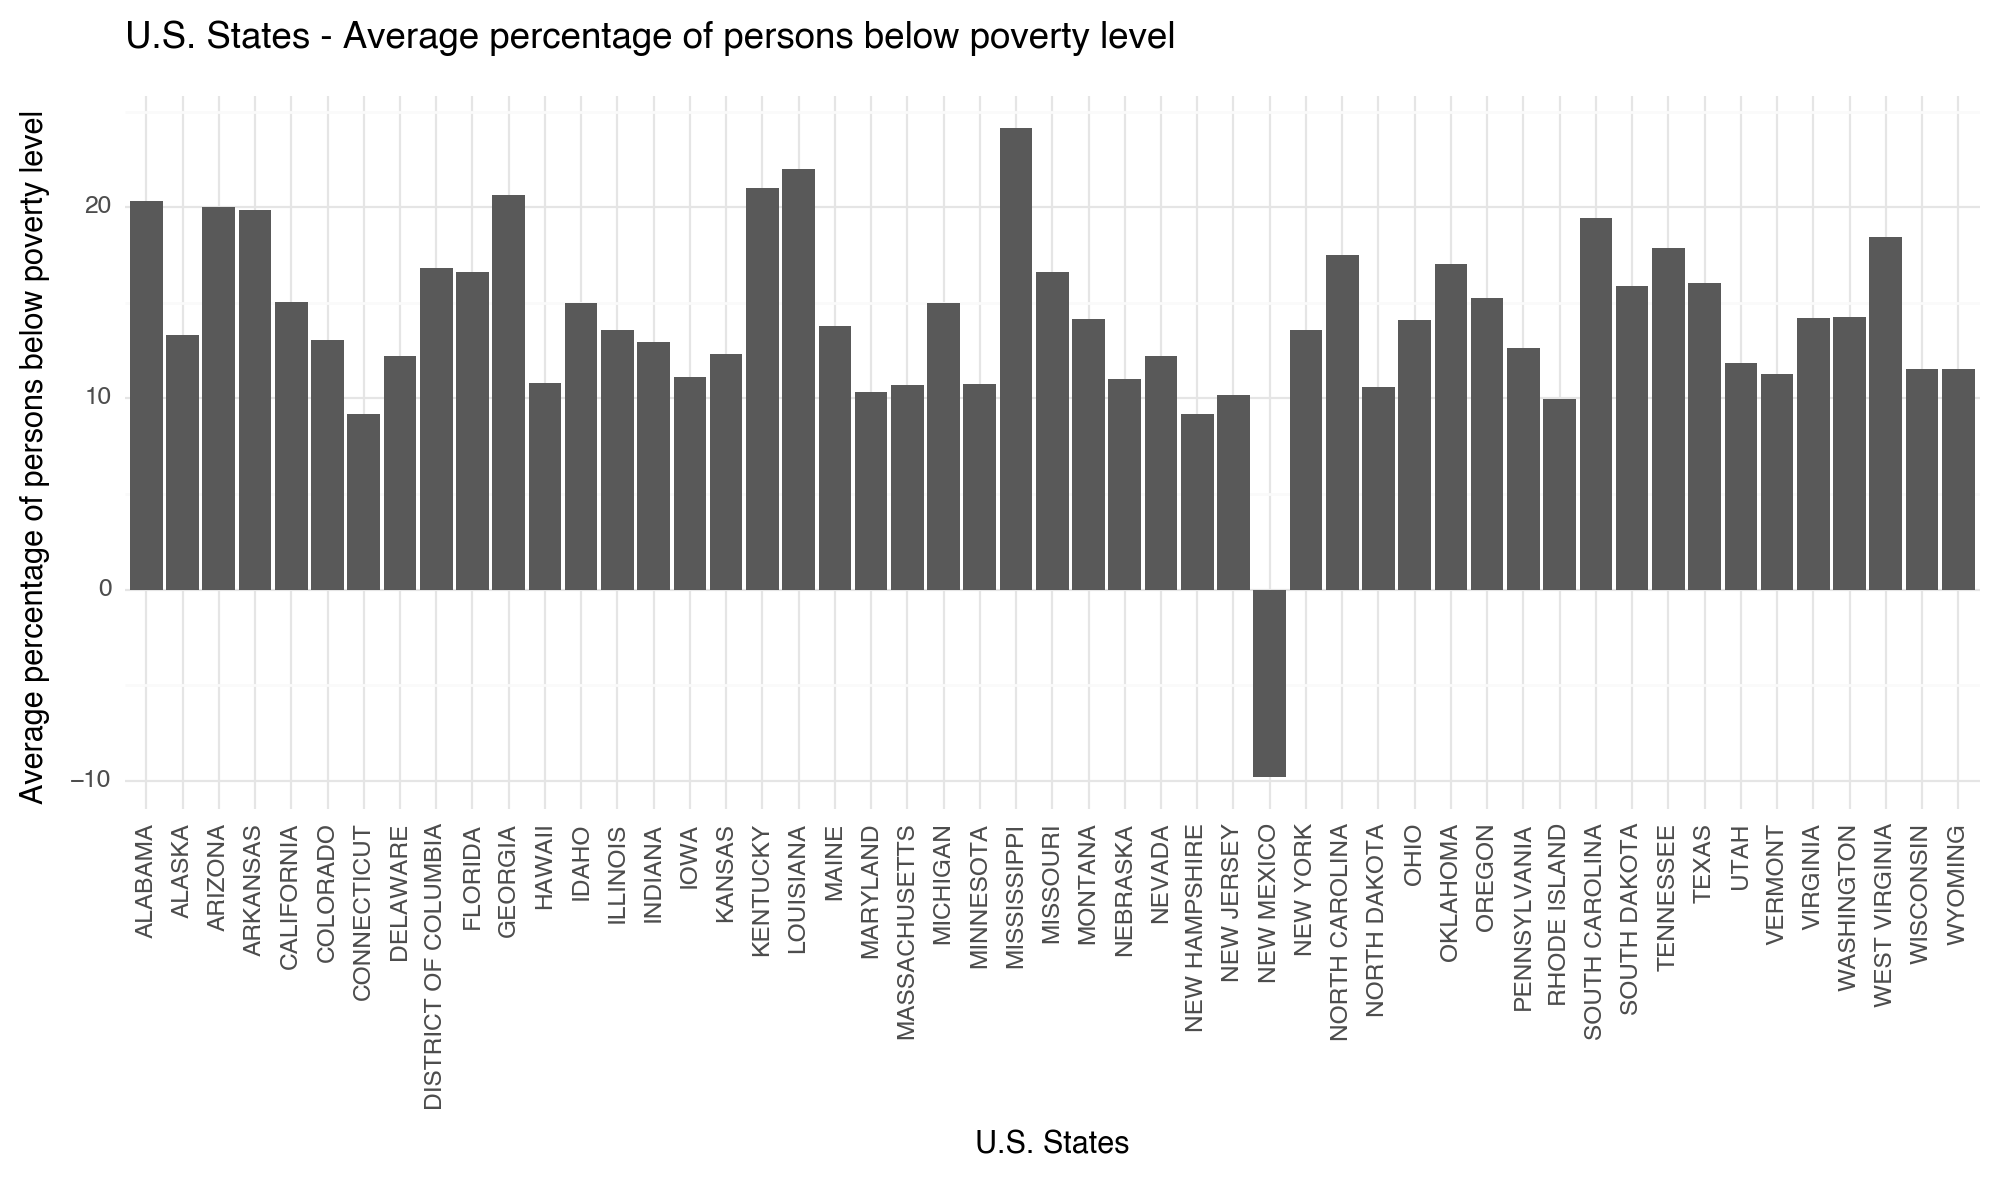

<Figure Size: (1000 x 600)>

In [126]:
# Set a default plot size.
plotnine.options.figure_size = (10, 6)

# Plot the data
p = (ggplot(EP_POV_table_grouped, aes(x=EP_POV_table_grouped.index, y='average_EP_POV')) +
 geom_col() +
 theme_minimal()
+ labs(x='U.S. States', y='Average percentage of persons below poverty level ', title='U.S. States - Average percentage of persons below poverty level')
+ theme(axis_text_x = element_text(angle = 90, vjust = 1, hjust=12))
)
p

In [127]:
# Reference a collection you have write access to. Here I reference an existing ecample collection called AnalyzedSets
my_collection = client.get_collection_by_name('AnalyzedSets')

In [133]:
# Now go ahead and push the analyzed data set to your collection to come back to later
my_collection.write_table('analyzed_data_set2', EP_POV_table_grouped, format='csv', index=True)



In [171]:
# Save your chart image to your collection as well
with my_collection.open('example-plot.png', 'wb', metadata={"content-type": "image/png"}) as fp:
    p.save(fp)

/Users/wisdomakpan/Projects/delfini/venv/lib/python3.12/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
/Users/wisdomakpan/Projects/delfini/venv/lib/python3.12/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: <_io.BufferedWriter name=94>
